Transition Matrix (P):
      Te    T1    T2    T3    T4    C1    C2    C3   C4    I
Te  1.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.0  0.0
T1  0.00  0.00  0.00  0.00  1.00  0.00  0.00  0.00  0.0  0.0
T2  0.02  0.00  0.00  0.00  0.23  0.48  0.24  0.03  0.0  0.0
T3  0.00  0.00  0.00  0.00  0.19  0.62  0.15  0.04  0.0  0.0
T4  0.00  0.00  0.00  0.00  0.00  0.05  0.84  0.10  0.0  0.0
C1  0.00  0.00  0.50  0.42  0.08  0.00  0.00  0.00  0.0  0.0
C2  0.00  0.03  0.45  0.33  0.19  0.00  0.00  0.00  0.0  0.0
C3  0.00  0.00  0.50  0.50  0.00  0.00  0.00  0.00  0.0  0.0
C4  0.00  0.00  0.66  0.17  0.17  0.00  0.00  0.00  0.0  0.0
I   0.00  0.00  0.00  0.00  1.00  0.00  0.00  0.00  0.0  0.0


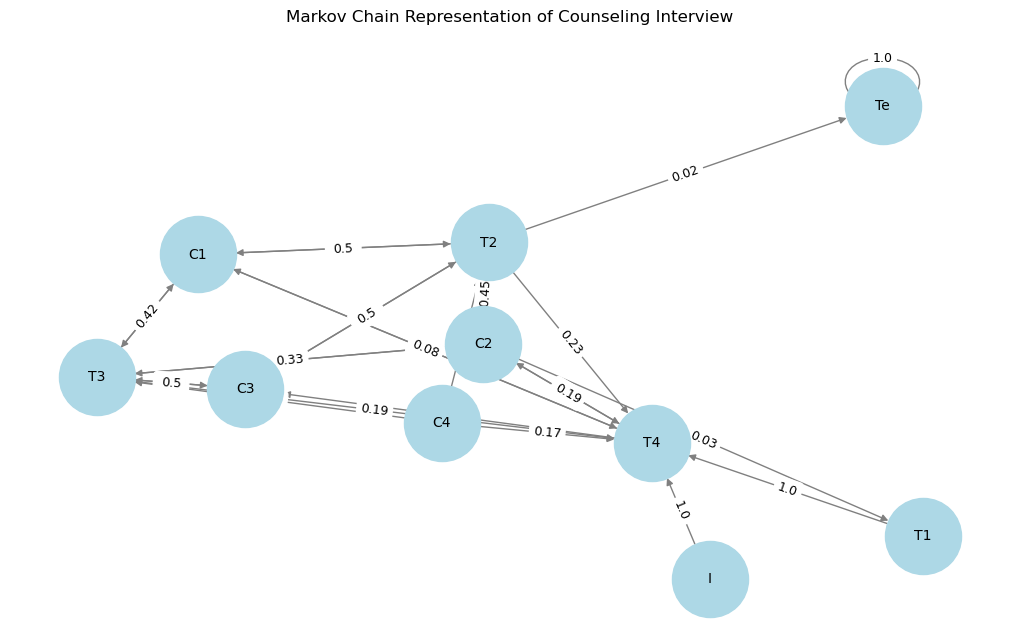

In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Define states
states = ["Te", "T1", "T2", "T3", "T4", "C1", "C2", "C3", "C4", "I"]

# Define the transition matrix P
P = np.array([
    [1,   0,   0,   0,   0,   0,   0,   0,   0,   0],  # Te
    [0,   0,   0,   0,   1,   0,   0,   0,   0,   0],  # T1
    [0.02, 0,  0,   0,   0.23, 0.48, 0.24, 0.03, 0,   0],  # T2
    [0,   0,   0,   0,   0.19, 0.62, 0.15, 0.04, 0,   0],  # T3
    [0,   0,   0,   0,   0,   0.05, 0.84, 0.10, 0,   0],  # T4
    [0,   0,   0.50, 0.42, 0.08, 0,   0,   0,   0,   0],  # C1
    [0,   0.03, 0.45, 0.33, 0.19, 0,   0,   0,   0,   0],  # C2
    [0,   0,   0.50, 0.50, 0,   0,   0,   0,   0,   0],  # C3
    [0,   0,   0.66, 0.17, 0.17, 0,   0,   0,   0,   0],  # C4
    [0,   0,   0,   0,   1,   0,   0,   0,   0,   0]   # I
])

# Convert transition matrix into a DataFrame for better visualization
df = pd.DataFrame(P, index=states, columns=states)
print("Transition Matrix (P):")
print(df)

# Plot the Markov Chain Graph
G = nx.DiGraph()

# Add nodes
for state in states:
    G.add_node(state)

# Add edges with transition probabilities
for i in range(len(states)):
    for j in range(len(states)):
        if P[i, j] > 0:
            G.add_edge(states[i], states[j], weight=P[i, j])

# Draw the graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)  # Positioning of nodes
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", edge_color="gray", font_size=10)
edge_labels = {(states[i], states[j]): round(P[i, j], 2) for i in range(len(states)) for j in range(len(states)) if P[i, j] > 0}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)

plt.title("Markov Chain Representation of Counseling Interview")
plt.show()